# Titanic_EDA_Kruthika_Muthireddy

* **IMPORTING THE NECESSARY LIBRARIES**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

* ** READING THE TITANIC DATASET **

In [2]:
titanic = pd.read_csv(r'C:\Users\Kruthika Reddy\Downloads\TITANIC.csv')

* **EXPLORING THE TITANIC DATASET**

In [3]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## STEP 1 : VARIABLE IDENTIFICATION
#### DEPENDENT VARIABLES : 
         1.Survived
#### INDEPENDENT VARIABLES :
         1.PassengerId
         2.Pclass
         3.Name
         4.Sex
         5.Age
         6.SibSp
         7.Parch
         8.Ticket
         9.Fare
         10.Cabin

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* **STATISTICAL SUMMARY OF DATA**

### DATATYPES :
   **STRING : ** *Name, Sex, Ticket, Cabin, Embarked*<br>
   **NUMERIC : ** *PassengerId, Survived, Pclass, Age, Sibsp, Parch, Fare*
### VARIABLE CATEGORY :
   **CATEGORICAL : ** *Name, Sex, Ticket, Cabin, Embarked, Survived, Pclass*<br>
   **CONTINUOUS : ** *Age, Fare*<br>
   **DISCRETE : ** *SibSp, Parch*<br>
**NOTE: *PassengerId, Name, Cabin and Ticket might not be necessary* **

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


For numeric datatypes, it will include: count, mean, std, min, max, and lower, 50, and upper percentiles.<br>
From above table, it is observed that the mean of survived column is 0.38, but since this is not a complete dataset,we cannot conclude on that.Count for ‘Age’ column is 714, it means dataset has some missing values. So we will have to cleanup the data before we start exploring.

#### DATA CLEANUP
From the above,in VARIABLE IDENTIFICATION,It can be observed that there are some missing values in ‘Age’, ‘Cabin’ and ‘Embarked’ columns.<br>
We can ignore and not use ‘Cabin’ which is the most missing.We can drop the columns which are not required in the analysis.<br>
For the missing ‘Ages’ and ‘Embarked’ ,we will omit those rows while using the data.

In [6]:
#dropping unnecessary columns from the given dataset
titanic_new = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## STEP 2 : EXPLORING DATA ANALYSIS
**1.UNIVARIATE ANALYSIS**<br>
**2.BIVARIATE ANALYSIS**

* ** FINDING THE RELATION BETWEEN SURVIVAL TO OTHER ATTRIBUTES**<br>
The relation between surival to the other attributes of the dataset can be determined using PEARSON'S R.<br>
Computing pairwise correlation of columns(excluding NA/null values) using pandas.DataFrame.corr method using ‘pearson’ standard correlation coefficient for the calculation.

In [7]:
titanic_new.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


From above correlation table we can see that Survival is inversly correlated to Pclass value.<br>
We also see that Age and Survival are slighltly correlated.We will try to visualize these corelation below.

### 1 . UNIVARIATE ANALYSIS

* **SEX**

Text(0.5,1,'Count of Passengers who survived')

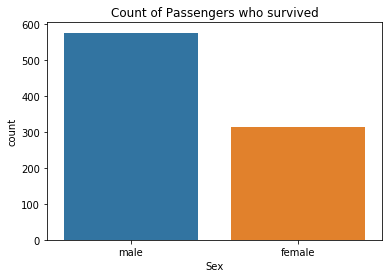

In [8]:
sns.countplot(x='Sex', data=titanic)
plt.title('Count of Passengers who survived')

From the above,it is clearly observed that,more male passengers survived compared to female passengers

* **EMBARKATION**

Text(0.5,1,'Count of Passengers at Ports Of Embarkation')

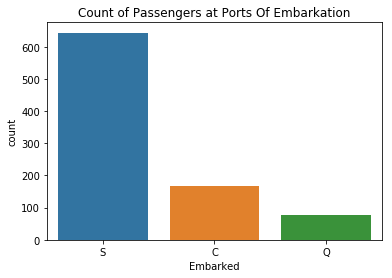

In [9]:
sns.countplot(x='Embarked', data=titanic)
plt.title('Count of Passengers at Ports Of Embarkation')

From the above analysis,it can be easily understood that more number of people are embarked at Southampton.

* **SURVIVED**

Text(0.5,1,'Count of Survivors')

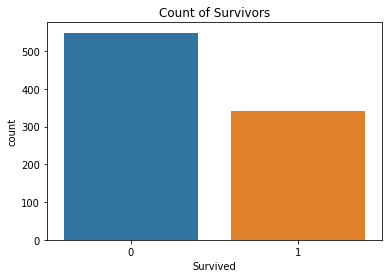

In [10]:
sns.countplot(x='Survived', data=titanic_new)
plt.title('Count of Survivors')

The above analysis states that there are less number of survivors.

* **PCLASS**

Text(0.5,1,'Count of passengers in different classes in Pclass')

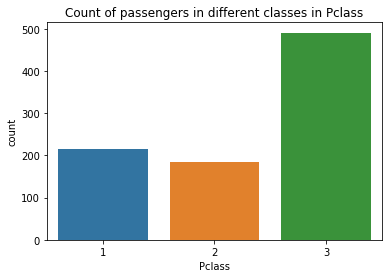

In [11]:
sns.countplot(x='Pclass', data=titanic_new)
plt.title('Count of passengers in different classes in Pclass')

From the above analysis,we can say that more number of passengers boarded belonged to Pclass-3.

* **AGE**

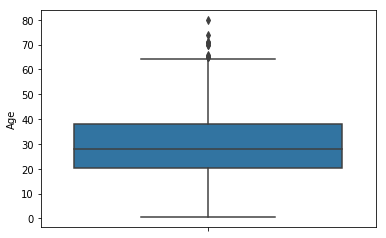

In [12]:
sns.boxplot(y='Age', data=titanic_new)

Text(0.5,1,'Agewise distribution of the passenger aboard the Titanic')

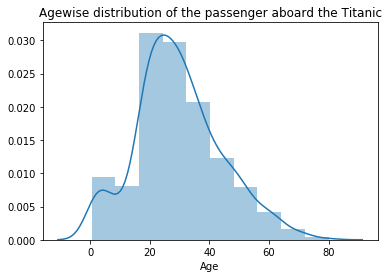

In [13]:
sns.distplot(titanic['Age'].dropna(), bins=10)
plt.title('Agewise distribution of the passenger aboard the Titanic')

Many passensgers are of age 15-40 yrs.<br>
From above,we can say that outliers exist in Age column and also it is skewed.

* **FARE**

Text(0.5,1,'Distribution of Passengers w.r.t Fare')

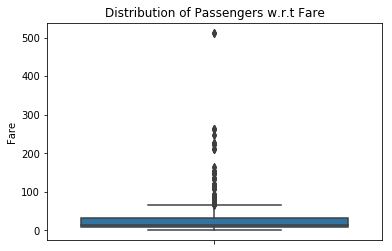

In [14]:
sns.boxplot(y='Fare', data=titanic_new)
plt.title('Distribution of Passengers w.r.t Fare')

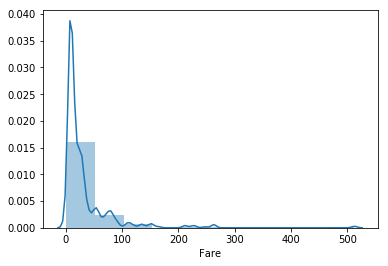

In [15]:
sns.distplot(titanic_new['Fare'].dropna(),bins=10)

From above, it can be visualised that outliers exist in Fare column and it's graph is also Skewed.

* **SIBSP**

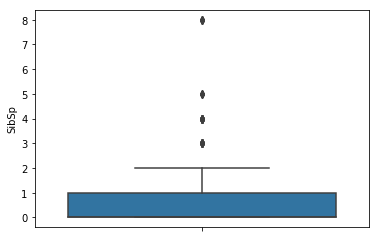

In [16]:
sns.boxplot(y='SibSp', data=titanic_new)

From the above boxplot,it is indicated that the outliers exist in SibSp.

* **PARCH**

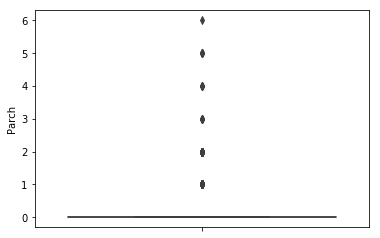

In [17]:
sns.boxplot(y='Parch', data=titanic_new)

From the above boxplot,it is indicated that the outliers exist in Parch.

### 2 . BIVARIATE ANALYSIS

* **AGE Vs FARE**

Text(0,0.5,'Fare')

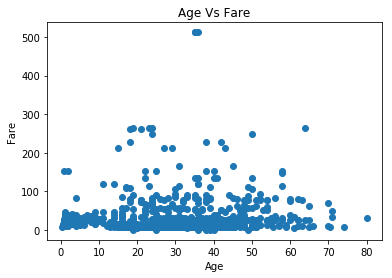

In [18]:
plt.scatter(titanic_new['Age'], titanic_new['Fare'])
plt.title('Age Vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

The above indicates the distribution of passengers according to their age and fare.<br>
More number of people boarded with less fare irrespective of their age.

* **AGE Vs SEX**

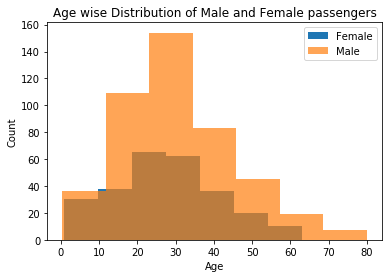

In [19]:
plt.hist(titanic_new['Age'][(titanic_new['Sex'] == 'female')].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(titanic_new['Age'][(titanic_new['Sex'] == 'male')].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female passengers')
plt.legend()

There were many male passengers aboared compared to female passengers.<br>Agewise distribution plot for passenges who Survived across both Genders by filtering out rows where ‘Survived’ = 1.

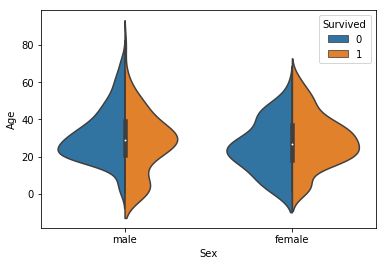

In [20]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = titanic_new, split = True) 

This graph gives a summary of the age range of men, women and children who were saved.<br>The survival rate is : <br> 1.Good for children. <br>2.High for women in the age range 20-50. <br>3.Lesser for men as the age increases.

* **AGE Vs SURVIVED**

In [21]:
young_survive = titanic_new['Age'][(titanic_new['Survived'] == 1)].min()
young_die = titanic_new['Age'][(titanic_new['Survived'] == 0)].min()
old_survive = titanic_new['Age'][(titanic_new['Survived'] == 1)].max()
old_die = titanic_new['Age'][(titanic_new['Survived'] == 0)].max()

print("Yougest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}".format(young_survive, young_die, old_survive, old_die))

Yougest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


* **FARE Vs SURVIVED**

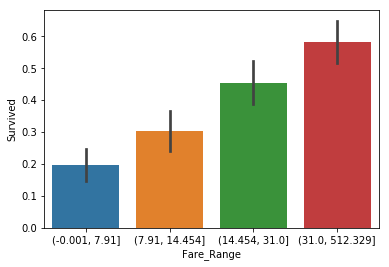

In [22]:
# Divide Fare into 4 bins 
titanic_new['Fare_Range'] = pd.qcut(titanic_new['Fare'], 4) 
  
# Barplot - Shows approximate values based  
# on the height of bars. 
sns.barplot(x ='Fare_Range', y ='Survived',  
data = titanic_new)

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

In [23]:
titanic_new=titanic_new.drop(['Fare_Range'],axis=1)

* **FARE Vs AGE**

Text(0.5,1,'Scatterplot of passengers w.r.t Fare and Age')

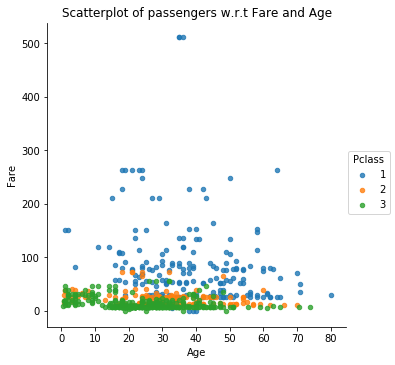

In [24]:
#Scatterplot of passengers w.r.t Fare and Age across 3 different classes in Pclass.
sns.lmplot('Age', 'Fare', data=titanic_new, fit_reg=False, hue="Pclass", scatter_kws={"marker": ".", "s": 20})
plt.title('Scatterplot of passengers w.r.t Fare and Age')

Text(0.5,0.98,'Scatterplot of passengers w.r.t Fare and Age for diff. ports')

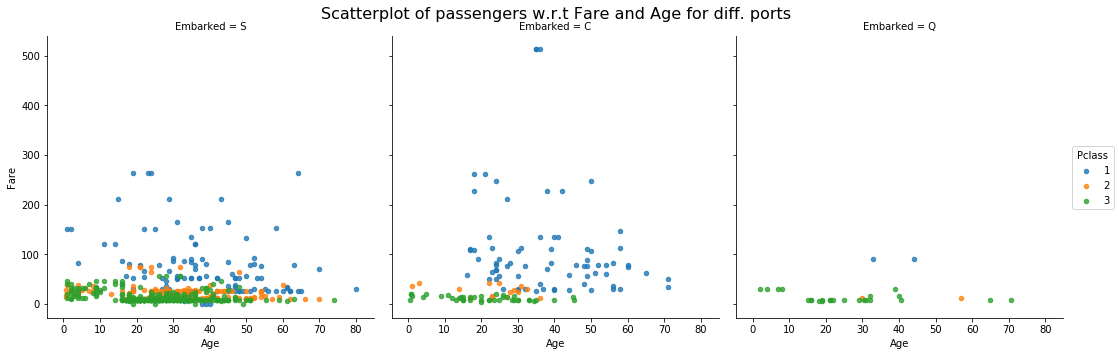

In [25]:
#Segregating the passengers according to thier Port of Embarkation and then compare Fare v/s Age across 3 classes.
sns.lmplot('Age', 'Fare', data=titanic_new, fit_reg=False, hue="Pclass", col="Embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)

From above visualization we can see that Fare is quite uniform for Class 2 and 3 across all ages.<br> Fare varies for Class 1 across all ages, but we cannot conclude why it varies. <br>We need more attributes to our data points to know to the reason for variation.<br> We can also observe that lot of passengers embarked from port of Southampton.

* **FAMILY_SIZE AND SURVIVAL RATE**

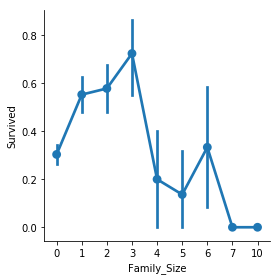

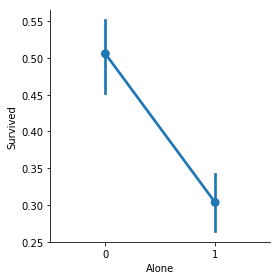

In [26]:
# Adding a column Family_Size 
titanic_new['Family_Size'] = 0
titanic_new['Family_Size'] = titanic_new['Parch']+titanic_new['SibSp'] 
  
# Adding a column Alone 
titanic_new['Alone'] = 0
titanic_new.loc[titanic_new.Family_Size == 0, 'Alone'] = 1
  
# Factorplot for Family_Size 
sns.factorplot(x ='Family_Size', y ='Survived', data = titanic_new) 
  
# Factorplot for Alone 
sns.factorplot(x ='Alone', y ='Survived', data = titanic_new) 

Family_Size denotes the number of people in a passenger’s family. <BR>It is calculated by summing the SibSp and Parch columns of a respective passenger.<BR>If a passenger is alone, the survival rate is less.<BR>If the family size is greater than 5, chances of survival decreases considerably.

In [27]:
titanic_new=titanic_new.drop(['Family_Size','Alone'],axis=1)

* **SURVIVED Vs SEX**

Text(0.5,0.98,'Survived vs Sex')

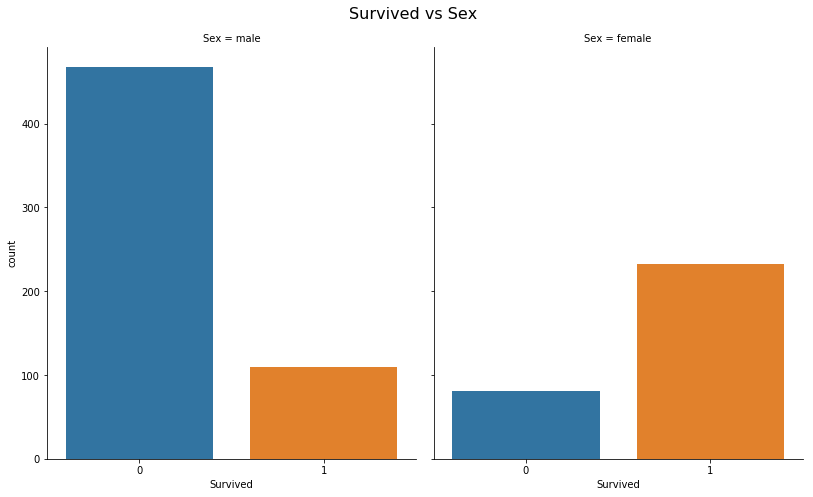

In [28]:
sns.factorplot('Survived', col='Sex', data=titanic_new, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Survived vs Sex', fontsize=16)

* ** SURVIVED Vs SEX and PORTS OF EMBARKATION**

Text(0.5,0.98,'Survived vs Sex')

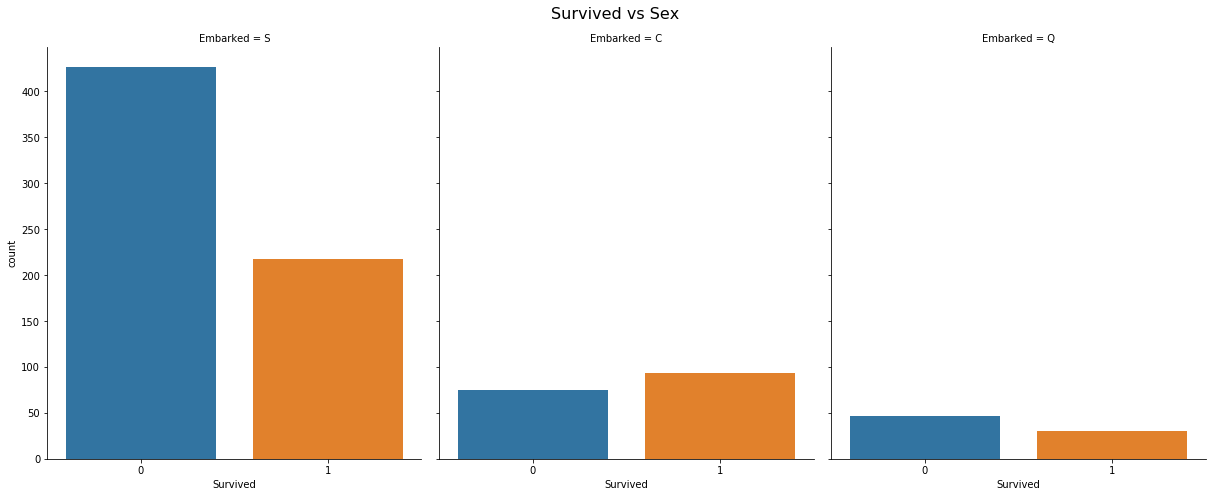

In [29]:
#survival vs sex w.r.to ports of embarkation
sns.factorplot('Survived', col='Embarked', data=titanic_new, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Survived vs Sex', fontsize=16)

* **SURVIVAL RATE Vs CLASS**

Survival based on passenger’s class for both genders.We can do this by grouping the dataframe with respect to Pclass, Survived and Sex.

In [30]:
group_by_pclass = titanic_new.groupby(['Pclass', 'Survived', 'Sex'])
group_by_pclass.size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

In [31]:
titanic_new.groupby(['Pclass', 'Sex']).describe()

Age                                                         \
               count       mean        std   min     25%   50%    75%   max   
Pclass Sex                                                                    
1      female   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0   
       male    101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0   
2      female   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0   
       male     99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0   
3      female  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0   
       male    253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0   

                Fare             ...  SibSp      Survived                      \
               count        mean ...    75%  max    count      mean       std   
Pclass Sex                       ...                                            
1      female   94.0  106.125798 ...    1.0  3.0     94.0  0.968085  0.176716   
       male    122.0   67.226127 ...    1.0  3.0    122.0  0.368852  0.484484   
2      female   76.0   21.970121 ...    1.0  3.0     76.0  0.921053  0.271448   
       male    108.0   19.741782 ...    1.0  2.0    108.0  0.157407  0.365882   
3      female  144.0   16.118810 ...    1.0  8.0    144.0  0.500000  0.501745   
       male    347.0   12.661633 ...    0.0  8.0    347.0  0.135447  0.342694   

                                        
               min  25%  50%  75%  max  
Pclass Sex                              
1      female  0.0  1.0  1.0  1.0  1.0  
       male    0.0  0.0  0.0  1.0  1.0  
2      female  0.0  1.0  1.0  1.0  1.0  
       male    0.0  0.0  0.0  0.0  1.0  
3      female  0.0  0.0  0.5  1.0  1.0  
       male    0.0  0.0  0.0  0.0  1.0  

[6 rows x 40 columns]

For the survival rate across all the class,take sum of survived passengers for each class and divide it by total number of passenger for that class and multiplying by 100.<BR>
We can use pandas groupby function to segregate passengers according to their class.

In [32]:
titanic_new.groupby(['Pclass'])['Survived'].sum()/titanic_new.groupby(['Pclass'])['Survived'].count()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Now it is concluded that class played a role in survival of the passengers.

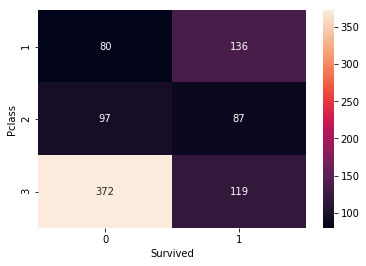

In [33]:
# Group the dataset by Pclass and Survived and then unstack them 
group = titanic_new.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
  
# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d")

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa.<br>Class 1 passengers have a higher survival chance compared to classes 2 and 3. <br>It implies that Pclass contributes a lot to a passenger’s survival rate.

Text(0.5,0.98,'Class wise segregation of passengers')

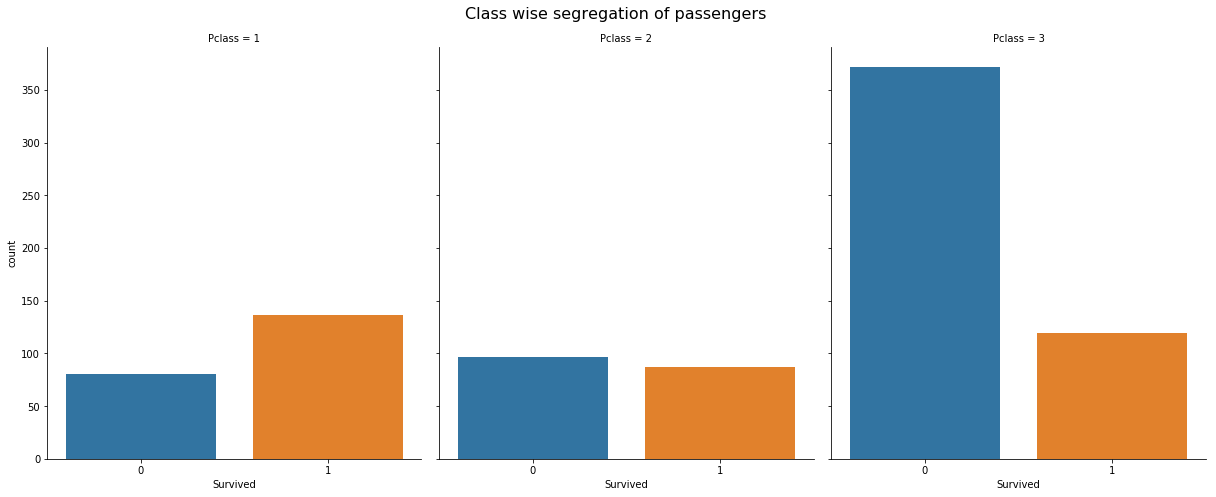

In [34]:
#FACTOR PLOT OF THE SURVIVAL RATE IN PCLASS
sns.factorplot('Survived', col='Pclass', data=titanic_new, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class wise segregation of passengers', fontsize=16)

Above visualization compares passengers who survived the tragedy and who did not, across three classes. We can further visualize survival of passengers of both genders across 3 classes.

Text(0.5,0.98,'Class and gender wise segregation of passengers')

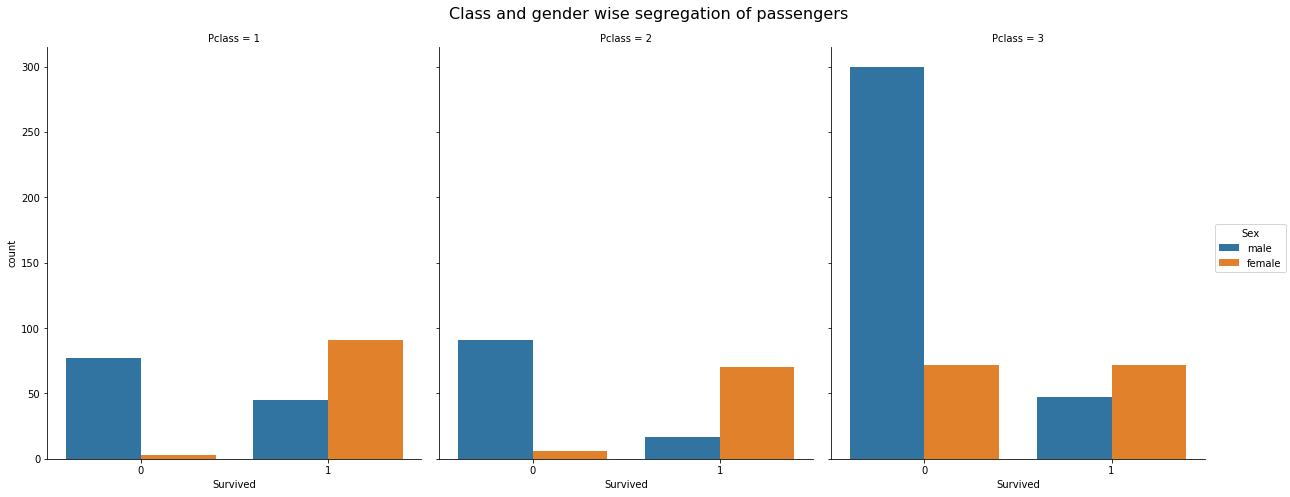

In [35]:
#survival rate across 3 different classes w.r.to their gender
sns.factorplot('Survived', col='Pclass', hue='Sex', data=titanic_new, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class and gender wise segregation of passengers', fontsize=16)

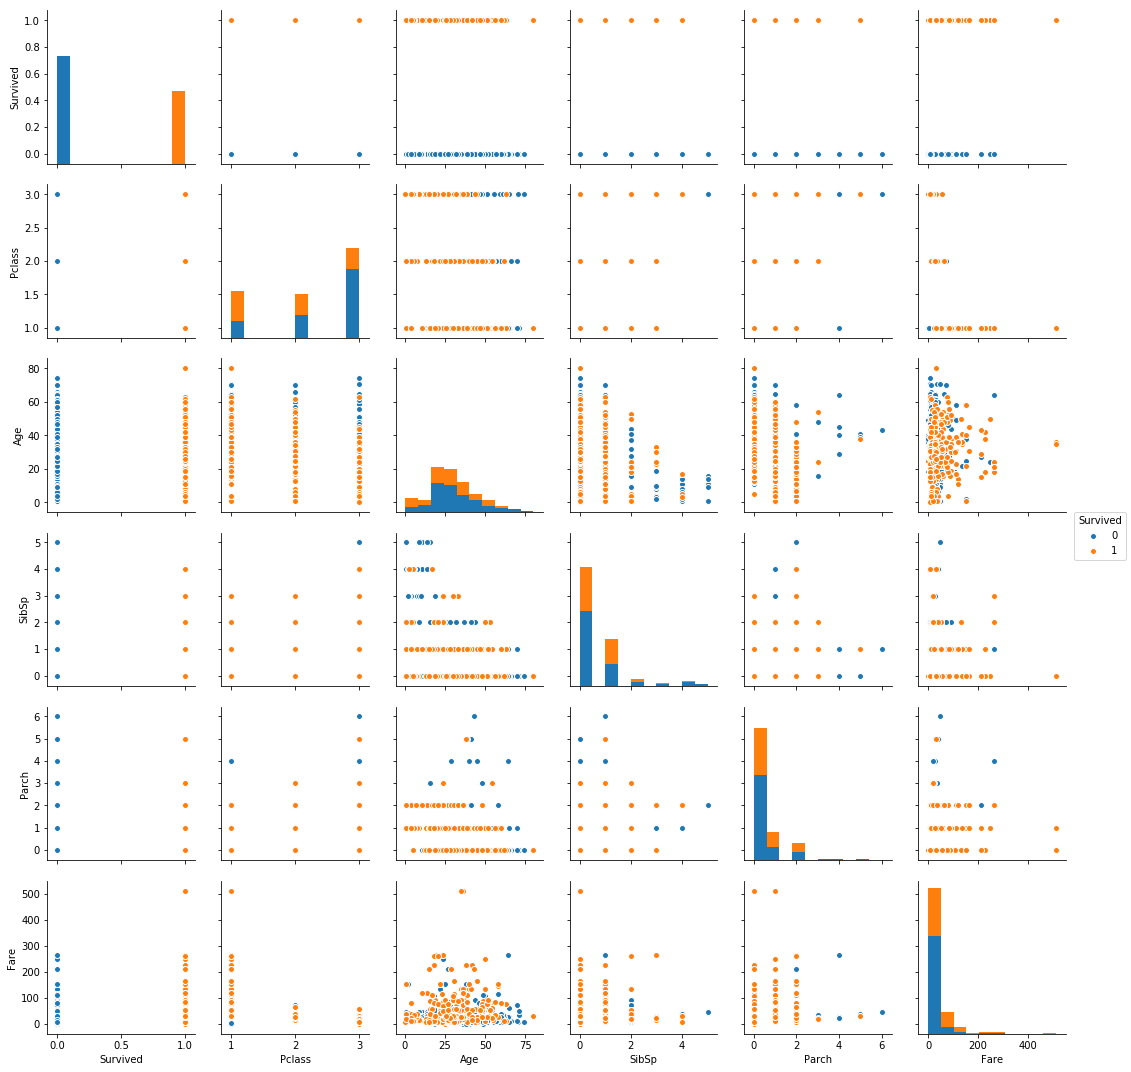

In [36]:
titanic_new_drop = titanic_new.dropna()
sns.pairplot(titanic_new_drop, hue='Survived');

**CORRELATION MATRIX OF THE ABOVE PAIRPLOT FOR BETTER UNDERSTANDING**

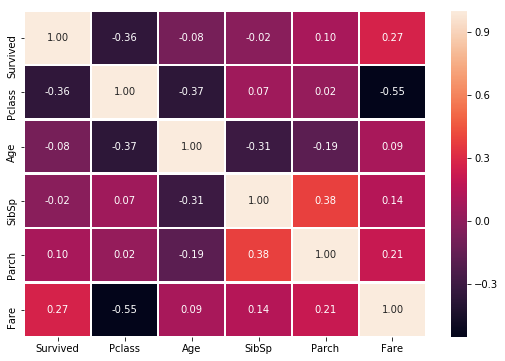

In [37]:
corr = titanic_new_drop.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

Survived and Fare positively correlated,Survived and Age are negatively correlated.Also, Survived and Pclass are negatively correlated. SibSp and Parch correlated.

## STEP 3 : MISSING VALUES TREATMENT

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


It can be observed that there are some missing values in ‘Age’, ‘Cabin’ and ‘Embarked’ columns. We can ignore and not use ‘Cabin’ which is the most missing.We can drop the columns which are not required in the analysis. For the missing ‘Ages’ and ‘Embarked’ ,we will omit those rows while using the data.

In [39]:
titanic_new = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
titanic_new.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
titanic_new.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We can observe that there are 177 null values in Age column.Since, Age is Skewed,we replace the null values with median of all the ages.<br>
We can also observe that there are 2 null values in Embarked.Since, Embarked is Categorical,we replace null values with mode of Embarked column.

In [42]:
titanic_new['Age']=titanic_new['Age'].fillna(value=titanic_new['Age'].median())
print(titanic_new['Embarked'].mode())

0    S
dtype: object


In [43]:
titanic_new['Embarked']=titanic_new['Embarked'].fillna(value='S')
titanic_new.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

All the null values are successfully treated.

## STEP 4 : OUTLIERS

From Univariate analysis,we can conclude that from Age,Fare,SibSp and Parch Outliers can be detected.

* ** OUTLIER HANDLING FOR AGE : **

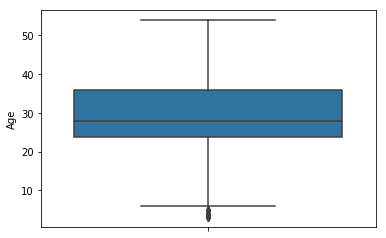

In [44]:
IQRage = titanic_new['Age'].quantile(0.75)-titanic_new['Age'].quantile(0.25)
Upper_age = titanic_new['Age'].quantile(0.75) + 1.5*IQRage
Lower_age = titanic_new['Age'].quantile(0.25) - 1.5*IQRage
Outlierage = titanic_new[(titanic_new['Age']>=Upper_age) | (titanic_new['Age']<=Lower_age)]
l1=list(Outlierage.index)
for i in range(len(l1)):
    titanic_new['Age'][l1[i]] = titanic_new['Age'].quantile(0.95)
sns.boxplot(y='Age', data=titanic_new)

* **OUTLIER HANDLING FOR FARE : **

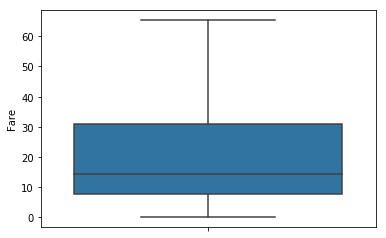

In [45]:
IQRfare = titanic_new['Fare'].quantile(0.75)-titanic_new['Fare'].quantile(0.25)
Upper_fare = titanic_new['Fare'].quantile(0.75) + 1.5*IQRfare
Lower_fare = titanic_new['Fare'].quantile(0.25) - 1.5*IQRfare
Outlierfare = titanic_new[(titanic_new['Fare']>=Upper_fare) | (titanic_new['Fare']<=Lower_fare)]
l2=list(Outlierfare.index)
for i in range(len(l2)):
    titanic_new['Fare'][l2[i]] = titanic_new['Fare'].quantile(0.87)
sns.boxplot(y='Fare', data=titanic_new)

* **OUTLIER HANDLING FOR SIBSP : **

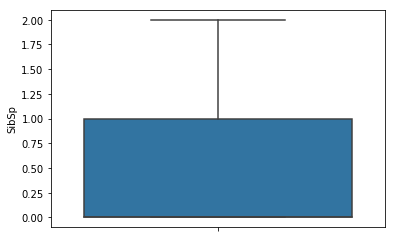

In [46]:
IQRsib = titanic_new['SibSp'].quantile(0.75)-titanic_new['SibSp'].quantile(0.25)
Upper_sib = titanic_new['SibSp'].quantile(0.75) + 1.5*IQRsib
Lower_sib= titanic_new['SibSp'].quantile(0.25) - 1.5*IQRsib
Outliersib = titanic_new[(titanic_new['SibSp']>=Upper_sib) | (titanic_new['SibSp']<=Lower_sib)]
l3=list(Outliersib.index)
for i in range(len(l3)):
    titanic_new['SibSp'][l3[i]] = titanic_new['SibSp'].quantile(0.93)
sns.boxplot(y='SibSp', data=titanic_new)

* **OUTLIER HANDLING FOR PARCH : **

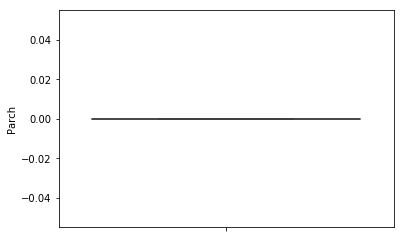

In [47]:
IQRpar = titanic_new['Parch'].quantile(0.75)-titanic_new['Parch'].quantile(0.25)
Upper_par = titanic_new['Parch'].quantile(0.75) + 1.5*IQRpar
Lower_par= titanic_new['Parch'].quantile(0.25) - 1.5*IQRpar
Outlierpar = titanic_new[(titanic_new['Parch']>=Upper_par) | (titanic_new['Parch']<=Lower_par)]
l4=list(Outlierpar.index)
for i in range(len(l4)):
    titanic_new['Parch'][l4[i]] = titanic_new['Parch'].quantile(0.75)
sns.boxplot(y='Parch', data=titanic_new)

## STEP 5 : FEATURE ENGINEERING
   **VARIABLE AND DUMMY VARIABLE CREATION**

In [48]:
titanic_new=pd.get_dummies(titanic_new, drop_first=True)
titanic_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,65.4800,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,28.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,54.0,2,0,21.0750,1,0,1
8,1,3,27.0,0,0,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


## STEP 6 : FEATURE ENGINEERING
   **VARIABLE TRANSFORMATION**

Age is left skewed,so we apply square root.also,Fare is right skewed,so apply sqrt.

In [49]:
titanic_new['Age']= np.sqrt(titanic_new['Age'])
titanic_new['Fare']= np.sqrt(titanic_new['Fare'])
titanic_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,4.690416,1,0,2.692582,1,0,1
1,1,1,6.164414,1,0,8.091971,0,0,0
2,1,3,5.099020,0,0,2.815138,0,0,1
3,1,1,5.916080,1,0,7.286975,0,0,1
4,0,3,5.916080,0,0,2.837252,1,0,1
5,0,3,5.291503,0,0,2.908316,1,1,0
6,0,1,7.348469,0,0,7.201562,1,0,1
7,0,3,7.348469,2,0,4.590752,1,0,1
8,1,3,5.196152,0,0,3.336660,0,0,1
9,1,2,3.741657,1,0,5.483685,0,0,0


In [50]:
titanic_new.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,5.396603,0.400673,0.0,4.480155,0.647587,0.086420,0.725028
std,0.486592,0.836071,1.131828,0.637727,0.0,1.974229,0.477990,0.281141,0.446751
min,0.000000,1.000000,1.732051,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,4.873330,0.000000,0.0,2.812542,0.000000,0.000000,0.000000
50%,0.000000,3.000000,5.291503,0.000000,0.0,3.801868,1.000000,0.000000,1.000000
75%,1.000000,3.000000,6.000000,1.000000,0.0,5.567764,1.000000,0.000000,1.000000
max,1.000000,3.000000,7.348469,2.000000,0.0,8.091971,1.000000,1.000000,1.000000


## CLASSIFICATION

* **DEFINING 'X' AND 'Y'**

In [51]:
X=titanic_new.iloc[:,1:].values
y=titanic_new.iloc[:,0].values

* **SPLITTING THE DATASET**

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=0)

In [53]:
X_train.shape

(668, 8)

In [54]:
X_test.shape

(223, 8)

In [55]:
y_train.shape

(668,)

In [56]:
y_test.shape

(223,)

## BUILDING THE MODEL

### 1.  LOGISTIC  REGRESSION

In [57]:
from sklearn.linear_model import LogisticRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LogisticRegression()

# fit the model to the training data
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
y_pred = lr.predict(X_test)
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [59]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy is  :' ,round(accuracy,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,4)*100)
print('Roc Auc is  :',round(roc_auc,2)*100)

Accuracy is  : 78.0
F1 score is : 70.0
Precision is  : 72.0
Recall is  : 69.05
Roc Auc is  : 76.0


### 2. DECISION TREE

In [63]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [64]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy is  :' ,round(accuracy,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,4)*100)
print('Roc Auc is  :',round(roc_auc,2)*100)

Accuracy is  : 74.0
F1 score is : 65.0
Precision is  : 65.0
Recall is  : 64.29
Roc Auc is  : 72.0


### 3. RANDOM FOREST

In [66]:
#further transformtion for higher Accuracy
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 40, n_jobs= 2, random_state= 0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [67]:
y_pred = clf.predict(X_test)
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [68]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy is  :' ,round(accuracy,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,4)*100)
print('Roc Auc is  :',round(roc_auc,2)*100)

Accuracy is  : 82.0
F1 score is : 75.0
Precision is  : 79.0
Recall is  : 71.43
Roc Auc is  : 80.0


### 4. KNN

In [70]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
np.set_printoptions(suppress=True)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy is  :' ,round(accuracy,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,4)*100)
print('Roc Auc is  :',round(roc_auc,2)*100)

Accuracy is  : 80.0
F1 score is : 73.0
Precision is  : 74.0
Recall is  : 72.61999999999999
Roc Auc is  : 79.0


** *FOR US TO PREDICT THE SURVIVORS AND NON-SURVIVORS,WE WILL DRAW A CONFUSION MATRIX BY FURTHER EVALUATING:* **

In [73]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(clf, X, y, cv=3)
confusion_matrix(y, predictions)

array([[466,  83],
       [114, 228]], dtype=int64)

## SUMMARY

We started with the data exploration where we performed all types of analysis and predictions for the dataset, checked about missing data and learned which features are important. During this process we used seaborn and matplotlib to do the visualizations. During the data preprocessing part, we computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training machine learning models,applied different classification models on the training data.After applying various models on the data,we calculated the accuracy of the respective models, to know the best fitting model for the given dataset.Lastly, we looked at it’s confusion matrix and computed the models precision, recall and f-score.

## CONCLUSION

** FROM THE CONFUSION MATRIX,**
True positive : 466(we predicted a positive result and it was positive)<br>
True negative : 228(we predicted a negative result and it was negative)<br>
False positive : 83(we predicted a positive result and it was negative)<br>
False negative : 114(we predicted a negative result and it was positive)<br>

** *228 passengers were survived and 466 passengers could'nt survive whereas 83 were falsely predicted as not survived and 114 as survived.* **